# 1. Package Loading

In [1]:
#Basic
import pandas as pd
import numpy as np 
import random   
import os
import time
from datetime import timedelta
import pickle

In [2]:

#ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error
from math import sqrt


In [67]:
#Visualization               
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Loading

In [4]:
data_dir = '/Users/chiyunchen/pythonProject/ML_hw1/data'
!ls '/Users/chiyunchen/pythonProject/ML_hw1/data'

data_mnist.csv data_mnist.zip test_mnist.csv test_mnist.zip


In [5]:
start_time = time.time()
data = pd.read_csv(data_dir+'/data_mnist.csv')
test = pd.read_csv(data_dir+'/test_mnist.csv')
print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

--- 0:00:01.623983 time elapsed ---


Check out the look of data

In [6]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Data Structure**
- 28 x 28 = 784 pixel
- pixel-value 0-255
- x = i * 28 + j,  i and j are integers between 0 and 27
- row i and column j 
- For example,  pixel31 = 4th col, 2nd row

## 2.1 Data Wrangling

Convert the dataframe into a numpy array (matrix)

In [117]:
start_time = time.time()

mnist = np.array(data)
mnist_prediction= np.array(test)
X, y= mnist[:,1:], mnist[:,0]
print("X Data Shape is ", X.shape)
print("y Data Shape is ", y.shape)
print("The Data Shape for Prediction is ",mnist_prediction.shape)

print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

X Data Shape is  (42000, 784)
y Data Shape is  (42000,)
The Data Shape for Prediction is  (10000, 784)
--- 0:00:00.152106 time elapsed ---


Let's Visualize the pixels data, randomly pick some samples to review the data.

What we need here is reshapeing the array data into 28x28 matrix and show the image by matplotlib package

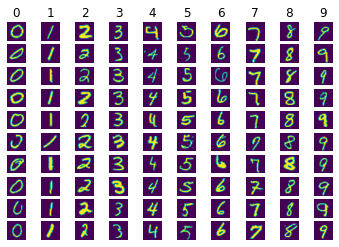

--- 0:00:01.553244 time elapsed ---


In [8]:
start_time = time.time()

categories = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
num_cat = len(categories)
samples = 10
for element, cat in enumerate(categories):
    idxs = np.nonzero([i == element for i in y])
    idxs = np.random.choice(idxs[0], samples, replace=False)
    for i , idx in enumerate(idxs):
        plt_idx = i * num_cat + element + 1
        plt.subplot(samples, num_cat, plt_idx)
        plt.imshow(X[idx].reshape((28, 28)))
        plt.axis("off")
        if i == 0:
            plt.title(cat)
        
plt.show()

print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

After Checking the major dataset, let's check the testing dataset.

We randomly pick one in the testing datasetwe, which is the one we need to predict, and visualize it to an image by a function.

In [121]:
def showBWImage(data,row):
    start_time = time.time()
    
    plt.imshow(data[row].reshape((28,28)))
    plt.show()
    print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

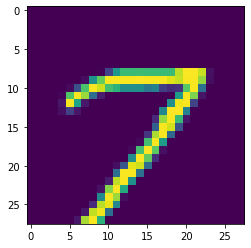

--- 0:00:00.092179 time elapsed ---


In [122]:
# Randomly pick one in the dataset we will need to predict
# And visualize the image
showBWImage(mnist_prediction,6666)

# 3. Model

## 3.0 Normalization

In [124]:
#Model Training dataset
norm_X = X/ 255.0
#StandardScaler() to normalize the data
scaler = StandardScaler()
sc_X = scaler.fit_transform(X)

## 3.1 Split Data

Spilt the data into training and testing part.
Testing part still from mnist data but for evaluate the model

In [13]:
start_time = time.time()

#Using the normalized data to prepare for traning
X_train,X_test,y_train,y_test = train_test_split(norm_X,y,test_size=0.25,random_state = 41, stratify=y)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 41, stratify=y)

print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

--- 0:00:00.276620 time elapsed ---


In [125]:
start_time = time.time()

#Using the StandardScaler() data to prepare for traning
sc_X_train,sc_X_test,sc_y_train,sc_y_test = train_test_split(sc_X,y,test_size=0.25,random_state = 41, stratify=y)
print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

--- 0:00:00.271715 time elapsed ---


/Users/chiyunchen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Digits Counts')

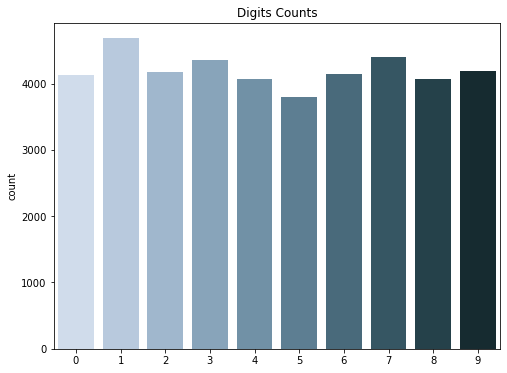

In [68]:
plt.figure(figsize=(8,6))
ax = sns.countplot(y, palette = "ch:s=-.5,r=.1")
plt.title("Digits Counts")

## 3.2 Finding the Best Model

### 3.2.1 Using Plot to Narrow Down the Range of Best K

By the rule of thumb is k < sqrt(n), which n is the number of the training samples.

There are 4,2000 * 0.75 = 31,500 images in training data, so k should smaller than sqrt(31,500) = 178.

Let's calculate the error for K values between 1 and 40, and visualize the result first, since checking every possibility is expensive.


In [70]:
error = []

for i in range(1, 40):
    print("Computing knn when n_neighbors= " + str(i) + "...")
    tic = time.time()
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    toc = time.time()
    error.append(np.mean(pred_i != y_test))
    print("Completed this model in " + str(toc-tic) + " Secs.")
    print("---------------------------------------")
print("Completed All Models.")

Computing knn when n_neighbors= 1...
Completed this model in 7.73134970664978 Secs.
---------------------------------------
Computing knn when n_neighbors= 2...
Completed this model in 8.285755157470703 Secs.
---------------------------------------
Computing knn when n_neighbors= 3...
Completed this model in 8.746206283569336 Secs.
---------------------------------------
Computing knn when n_neighbors= 4...
Completed this model in 10.353207111358643 Secs.
---------------------------------------
Computing knn when n_neighbors= 5...
Completed this model in 10.297792911529541 Secs.
---------------------------------------
Computing knn when n_neighbors= 6...
Completed this model in 10.387799978256226 Secs.
---------------------------------------
Computing knn when n_neighbors= 7...
Completed this model in 10.270109176635742 Secs.
---------------------------------------
Computing knn when n_neighbors= 8...
Completed this model in 10.382841110229492 Secs.
------------------------------------

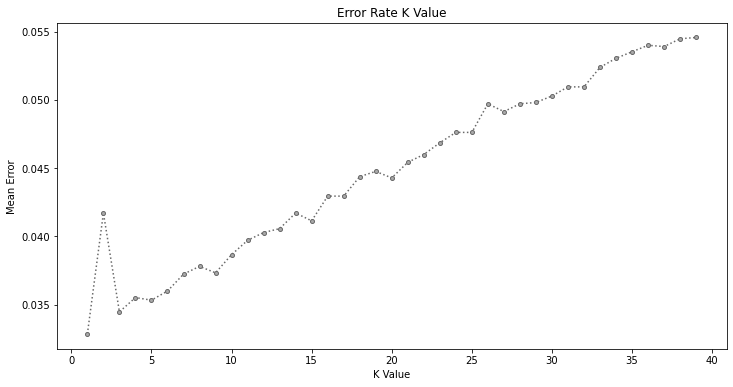

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='dimgray', linestyle='dotted', marker='.',
         markerfacecolor='darkgrey', markersize = 8)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

### 3.2.2 Model fitting with K-cross Validation and GridSearchCV

In previous section we know the best model may happened when n_neighbors < 10.

When n_neighbors > 15, the mean error wil exceed the maximum error that n_neighbors < 15.

Therefore, let's use GridSearchCV() to double check the model that n_neighbors < 15

Let's use GridSearchCV() to double check

In [72]:
knn = KNeighborsClassifier()
parameters = {"n_neighbors": range(1, 15)}
# Evaluate an algorithm using a cross Validation and set folds = 10
gridsearch = GridSearchCV(knn, parameters, cv=10,scoring='accuracy',verbose=3)
gridsearch_result = gridsearch.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV 1/10] END .................................n_neighbors=1; total time=   2.3s
[CV 2/10] END .................................n_neighbors=1; total time=   2.2s
[CV 3/10] END .................................n_neighbors=1; total time=   2.2s
[CV 4/10] END .................................n_neighbors=1; total time=   2.2s
[CV 5/10] END .................................n_neighbors=1; total time=   2.2s
[CV 6/10] END .................................n_neighbors=1; total time=   2.2s
[CV 7/10] END .................................n_neighbors=1; total time=   2.2s
[CV 8/10] END .................................n_neighbors=1; total time=   2.3s
[CV 9/10] END .................................n_neighbors=1; total time=   2.2s
[CV 10/10] END ................................n_neighbors=1; total time=   2.1s
[CV 1/10] END .................................n_neighbors=2; total time=   2.3s
[CV 2/10] END ................................

In [128]:
knn = KNeighborsClassifier()
parameters = {"n_neighbors": range(1, 15)}
# Evaluate an algorithm using a cross Validation and set folds = 10
sc_gridsearch = GridSearchCV(knn, parameters, cv=10,scoring='accuracy',verbose=0)
sc_gridsearch_result = gridsearch.fit(sc_X_train, sc_y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV 1/10] END .................................n_neighbors=1; total time=   2.5s
[CV 2/10] END .................................n_neighbors=1; total time=   2.2s
[CV 3/10] END .................................n_neighbors=1; total time=   2.2s
[CV 4/10] END .................................n_neighbors=1; total time=   2.2s
[CV 5/10] END .................................n_neighbors=1; total time=   2.2s
[CV 6/10] END .................................n_neighbors=1; total time=   2.2s
[CV 7/10] END .................................n_neighbors=1; total time=   2.2s
[CV 8/10] END .................................n_neighbors=1; total time=   2.2s
[CV 9/10] END .................................n_neighbors=1; total time=   2.3s
[CV 10/10] END ................................n_neighbors=1; total time=   2.3s
[CV 1/10] END .................................n_neighbors=2; total time=   2.4s
[CV 2/10] END ................................

#### Get the best Parameters of the Model

In [73]:
accuracy = gridsearch_result.best_score_*100
print("Best Parameters of the Model is: ",gridsearch_result.best_params_)
print("Accuarcy : {:.2f}%".format(accuracy))

Best Parameters of the Model is:  {'n_neighbors': 3}
Accuarcy : 96.59%


In [129]:
accuracy = sc_gridsearch_result.best_score_*100
print("Best Parameters of the Model is: ",gridsearch_result.best_params_)
print("Accuarcy : {:.2f}%".format(accuracy))

Best Parameters of the Model is:  {'n_neighbors': 1}
Accuarcy : 93.58%


#### Visulization of Result of Cross Validation

In [88]:
cv_resultDF = pd.concat([pd.DataFrame(gridsearch_result.cv_results_["params"]),pd.DataFrame(gridsearch_result.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
cv_resultDF

,n_neighbors,Accuracy
0,1,0.963968
1,2,0.958254
2,3,0.965937
3,4,0.964508
4,5,0.965238
5,6,0.964381
6,7,0.963556
7,8,0.961968
8,9,0.961746
9,10,0.960286


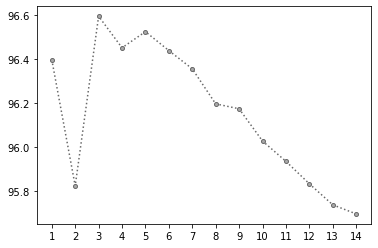

In [91]:
x = cv_resultDF['n_neighbors']
y = cv_resultDF['Accuracy']*100
plt.plot(x, y, color='dimgray', linestyle='dotted', marker='.',
         markerfacecolor='darkgrey', markersize = 8)
plt.xticks(x)
plt.show()

From the result of GridSearchCV(), we got that n_neighbors = 3 has the best model.

However, n_neighbors = 4 and 5 also have a accuracy.

Since the result is very closed, we will discuss the n_neighbors = 3, 4 ,and 5 in the testing data.

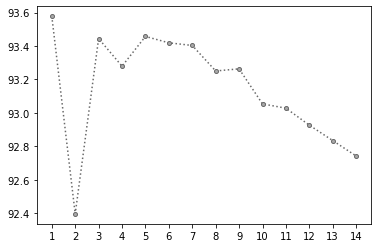

In [130]:
sc_cv_resultDF = pd.concat([pd.DataFrame(sc_gridsearch_result.cv_results_["params"]),pd.DataFrame(sc_gridsearch_result.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
x = sc_cv_resultDF['n_neighbors']
y = sc_cv_resultDF['Accuracy']*100
plt.plot(x, y, color='dimgray', linestyle='dotted', marker='.',
         markerfacecolor='darkgrey', markersize = 8)
plt.xticks(x)
plt.show()

And We also scaled data by StandardScaler() to run the model.

We can clearly see that tha performance of normalized data is better than scaled data.

Thus, we will use the normalized data to conduct further analysis.

### 3.2.3 Checking Accuracy on Testing Data

#### n_neighbors=3

**Training Model**

In [92]:
start_time = time.time()

knn_3 = KNeighborsClassifier(n_neighbors=3,weights="distance")
knn_3.fit(X_train, y_train)

print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

--- 0:00:00.007470 time elapsed ---


**Prediciton**

In [93]:
y_pred = knn_3.predict(X_test)

**Evaluation**

In [94]:
class_report_3 = classification_report(y_test, y_pred)
accuracy_3 = accuracy_score(y_test,y_pred)*100
precision_3 = precision_score(y_test,y_pred,average='micro')*100
recall_3 = recall_score(y_test,y_pred,average='micro')*100

In [95]:
print(class_report_3)
print("Accuracy of testing dataset of n_neighbors=3 is : {:.2f}%".format(accuracy_3) )
print("Precision of testing dataset of n_neighbors=3 is : {:.2f}%".format(precision_3) )
print("Recall of testing dataset of n_neighbors=3 is : {:.2f}%".format(accuracy_3) )

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1033
           1       0.96      0.99      0.98      1171
           2       0.98      0.96      0.97      1044
           3       0.97      0.97      0.97      1088
           4       0.98      0.96      0.97      1018
           5       0.96      0.96      0.96       949
           6       0.98      0.98      0.98      1034
           7       0.95      0.97      0.96      1100
           8       0.98      0.93      0.95      1016
           9       0.95      0.96      0.95      1047

    accuracy                           0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500

Accuracy of testing dataset of n_neighbors=3 is : 96.79%
Precision of testing dataset of n_neighbors=3 is : 96.79%
Recall of testing dataset of n_neighbors=3 is : 96.79%


#### n_neighbors=4

**Training Model**

In [96]:
start_time = time.time()

knn_4 = KNeighborsClassifier(n_neighbors=4,weights="distance")
knn_4.fit(X_train, y_train)

print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

--- 0:00:00.015486 time elapsed ---


**Prediction**

In [97]:
y_pred = knn_4.predict(X_test)

**Evaluation**

In [98]:
class_report_4 = classification_report(y_test, y_pred)
accuracy_4 = accuracy_score(y_test,y_pred)*100
precision_4 = precision_score(y_test,y_pred,average='micro')*100
recall_4 = recall_score(y_test,y_pred,average='micro')*100

In [99]:
print(class_report_4)
print("Accuracy of testing dataset of n_neighbors=4 is : {:.2f}%".format(accuracy_4) )
print("Precision of testing dataset of n_neighbors=4 is : {:.2f}%".format(precision_4) )
print("Recall of testing dataset of n_neighbors=4 is : {:.2f}%".format(accuracy_4) )

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1033
           1       0.96      0.99      0.98      1171
           2       0.98      0.96      0.97      1044
           3       0.97      0.97      0.97      1088
           4       0.98      0.96      0.97      1018
           5       0.97      0.96      0.96       949
           6       0.98      0.98      0.98      1034
           7       0.95      0.97      0.96      1100
           8       0.99      0.93      0.96      1016
           9       0.94      0.96      0.95      1047

    accuracy                           0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500

Accuracy of testing dataset of n_neighbors=4 is : 96.83%
Precision of testing dataset of n_neighbors=4 is : 96.83%
Recall of testing dataset of n_neighbors=4 is : 96.83%


#### n_neighbors=5

**Training Model**

In [100]:
start_time = time.time()

knn_5 = KNeighborsClassifier(n_neighbors=5,weights="distance")
knn_5.fit(X_train, y_train)

print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

--- 0:00:00.016416 time elapsed ---


**Prediction**

In [101]:
y_pred = knn_5.predict(X_test)

**Evaluation**

In [102]:
class_report_5 = classification_report(y_test, y_pred)
accuracy_5 = accuracy_score(y_test,y_pred)*100
precision_5 = precision_score(y_test,y_pred,average='micro')*100
recall_5 = recall_score(y_test,y_pred,average='micro')*100

In [103]:
print(class_report_5)
print("Accuracy of testing dataset of n_neighbors=5 is : {:.2f}%".format(accuracy_5) )
print("Precision of testing dataset of n_neighbors=5 is : {:.2f}%".format(precision_5) )
print("Recall of testing dataset of n_neighbors=5 is : {:.2f}%".format(accuracy_5) )

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1033
           1       0.95      0.99      0.97      1171
           2       0.99      0.95      0.97      1044
           3       0.96      0.96      0.96      1088
           4       0.98      0.96      0.97      1018
           5       0.96      0.96      0.96       949
           6       0.98      0.99      0.98      1034
           7       0.95      0.97      0.96      1100
           8       0.99      0.92      0.95      1016
           9       0.94      0.97      0.95      1047

    accuracy                           0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500

Accuracy of testing dataset of n_neighbors=5 is : 96.66%
Precision of testing dataset of n_neighbors=5 is : 96.66%
Recall of testing dataset of n_neighbors=5 is : 96.66%


### 3.2.4 Result And Decision

**Consider the testing data result, we will chose n_neighbors=4 be our best knn model.**

## 3.4 Model Saving

In [104]:
pickle.dump(knn_4, open("Best_knn_model.pkl", "wb"))

## 3.5 Model Loading

In [105]:
loaded_model = pickle.load(open("Best_knn_model.pkl", 'rb'))

# 5. Prediction

Normalization

In [106]:
mnist_prediction = mnist_prediction/255.0

Prediction

In [107]:
results = loaded_model.predict(mnist_prediction)

# 6. Submission

In [108]:
sub = pd.DataFrame({'ImageId':np.arange(10000),'Label':results.squeeze().astype(np.int)})
sub["ImageId"]=sub["ImageId"]+1
sub.head()

<ipython-input-108-f5d890d7a65e>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sub = pd.DataFrame({'ImageId':np.arange(10000),'Label':results.squeeze().astype(np.int)})


,ImageId,Label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4


In [119]:
sub.tail()

,ImageId,Label
9995,9996,2
9996,9997,3
9997,9998,4
9998,9999,5
9999,10000,6


### Randomly Pick One to Check the Prediction

In [111]:
print(sub.iloc[777])

ImageId    778
Label        1
Name: 777, dtype: int64


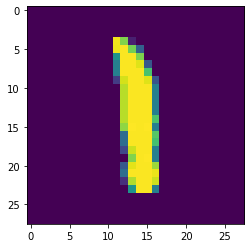

--- 0:00:00.081015 time elapsed ---


In [123]:
showBWImage(mnist_prediction,777)

We successfully predict the digit for the random sample here by given data.

Let's save the results into CVS file.

In [120]:
sub.to_csv('hw01_submission.csv', index=False)